In [18]:
import sys
!{sys.executable} -m pip install evodiff


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


## Conditional generation


### Evolutionary guided sequence generation with EvoDiff

In [ ]:
from evodiff.pretrained import OA_DM_640M

checkpoint = OA_DM_640M()
model, collater, tokenizer, scheme = checkpoint

# Move the model to CUDA
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)

In [4]:
model

ByteNetLMTime(
  (embedder): ByteNetTime(
    (time_encoding): PositionalEncoding1D()
    (embedder): Embedding(31, 8, padding_idx=28)
    (up_embedder): PositionFeedForward(
      (conv): Conv1d(8, 1280, kernel_size=(1,), stride=(1,))
    )
    (layers): ModuleList(
      (0): ByteNetBlock(
        (conv): MaskedConv1d(1280, 1280, kernel_size=(5,), stride=(1,), padding=(2,))
        (sequence1): Sequential(
          (0): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
          (1): GELU(approximate='none')
          (2): PositionFeedForward(
            (conv): Conv1d(1280, 1280, kernel_size=(1,), stride=(1,))
          )
          (3): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
          (4): GELU(approximate='none')
        )
        (sequence2): Sequential(
          (0): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
          (1): GELU(approximate='none')
          (2): PositionFeedForward(
            (conv): Conv1d(1280, 1280, kernel_size=(1,), stri

In [ ]:
!pip install torch_geometric torch_scatter

  Using cached torch_scatter-2.1.2.tar.gz (108 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [417 lines of output]
      Compiling without OpenMP...
      Compiling without OpenMP...
      Compiling without OpenMP...
      Compiling without OpenMP...
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.macosx-10.9-x86_64-3.11
      creating build/lib.macosx-10.9-x86_64-3.11/torch_scatter
      copying torch_scatter/placeholder.py -> build/lib.macosx-10.9-x86_64-3.11/torch_scatter
      copying torch_scatter/__init__.py -> build/lib.macosx-10.9-x86_64-3.11/torch_scatter
      copying torch_scatter/segment_csr.py -> build/lib.macosx-10.9-x86_64-3.11/torch_scatter
      copying torch_scatter/segment_coo.py -> build/lib.macosx-10.9-x86_64-3.11/torch_scatter
      copying torch_scatter/utils.py -> build/lib.mac

Failed to build torch_scatter

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (torch_scatter)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install biotite==0.35.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.8/31.8 MB 5.8 MB/s eta 0:00:0000:0100:01
ERROR: Could not install packages due to an OSError: [Errno 28] No space left on device


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Condition on indexes (input list that masks the amino acids)

In [10]:
# from evodiff.pretrained import OA_DM_640M
# from evodiff.conditional_generation import inpaint_simple

# # Load the model
# checkpoint = OA_DM_640M()
# model, collater, tokenizer, scheme = checkpoint

# # Move the model to CUDA if available
# device = 'cuda' if torch.cuda.is_available() else 'cpu'
# model = model.to(device)



from evodiff.conditional_generation import inpaint_simple


def generate_conditional_sequence_OA_DM(sequence: str, condition_indices: list) -> str:
    """
    Generates a conditional sequence based on a list of indices, starting from 1.

    Args:
    - sequence (str): The original sequence.
    - condition_indices (list): A list of indices (starting from 1) to condition the sequence.

    Returns:
    - str: The generated sequence.
    """
    # Convert sequence to a list for mutability
    masked_sequence = list(sequence)
    
    # Adjust indices to be zero-based
    zero_based_indices = [idx - 1 for idx in condition_indices]
    
    # Mask specified indices with '#'
    for idx in zero_based_indices:
        masked_sequence[idx] = '#'  # Mark the position for inpainting
    
    # Join to form the masked sequence
    masked_sequence = ''.join(masked_sequence)
    generated_sequence = masked_sequence
    
    # Sequentially apply inpainting to each index individually
    for idx in zero_based_indices:
        # Apply inpainting to the masked character position
        sample, entire_sequence, generated_region = inpaint_simple(
            model, generated_sequence, idx, idx + 1, tokenizer=tokenizer, device=device
        )
        # Replace the masked character with the generated content
        generated_sequence = generated_sequence[:idx] + generated_region + generated_sequence[idx + 1:]
    
    return generated_sequence


# Example
sequence = 'DQTERTVRSFEGRRTAPYLDSRNVLTIGYGHLLNRPGANKSWEGRLTSALPREFKQRLTELAASQLHETDVRLATARAQALYGSGAYFESVPVSLNDLWFDSVFNLGERKLLNWSGLRTKLESRDWGAAAKDLGRHTFGREPVSRRMAESMRMRRGIDLNHYNI'
condition_indices = [1, 4, 6, 8, 10]

generated_sequence = generate_conditional_sequence_OA_DM(sequence, condition_indices)
print(f"Original sequence:\t{sequence}")
print(f"Generated sequence:\t{generated_sequence}")

100%|██████████| 1/1 [00:00<00:00, 55.50it/s]

Original sequence:	DQTERTVRSFEGRRTAPYLDSRNVLTIGYGHLLNRPGANKSWEGRLTSALPREFKQRLTELAASQLHETDVRLATARAQALYGSGAYFESVPVSLNDLWFDSVFNLGERKLLNWSGLRTKLESRDWGAAAKDLGRHTFGREPVSRRMAESMRMRRGIDLNHYNI
Generated sequence:	VQTARFVGSDEGRRTAPYLDSRNVLTIGYGHLLNRPGANKSWEGRLTSALPREFKQRLTELAASQLHETDVRLATARAQALYGSGAYFESVPVSLNDLWFDSVFNLGERKLLNWSGLRTKLESRDWGAAAKDLGRHTFGREPVSRRMAESMRMRRGIDLNHYNI


# For the $\textbf{Escherichia-coli}$:

### $\to$ mask amino acids that are below a threshold and utilize evodiff generative model 

In [ ]:
Escherichia_coli = "KIEEGKLVIWINGDKGYNGLAEVGKKFEKDTGIKVTVEHPDKLEEKFPQVAATGDGPDIIFWAHDRFGGYAQSGLLAEITPDKAFQDKLYPFTWDAVRYNGKLIAYPIAVEALSLIYNKDLLPNPPKTWEEIPALDKELKAKGKSALMFNLQEPYFTWPLIAADGGYAFKYENGKYDIKDVGVDNAGAKAGLTFLVDLIKNKHMNADTDYSIAEAAFNKGETAMTINGPWAWSNIDTSKVNYGVTVLPTFKGQPSKPFVGVLSAGINAASPNKELAKEFLENYLLTDEGLEAVNKDKPLGAVALKSYEEELAKDPRIAATMENAQKGEIMPNIPQMSAFWYAVRTAVINAASGRQTVDEALKDAQTRITK"

from src.fireprot_asr_analysis import FireProtASR_AminoAcid_Analysis


file_path = '/home/johnny/Downloads/Fire-Prot-ASR/results_lbynr7_623-Escherichia-coli/results/ancestrals.csv'
ASR_analysis = FireProtASR_AminoAcid_Analysis(file_path)

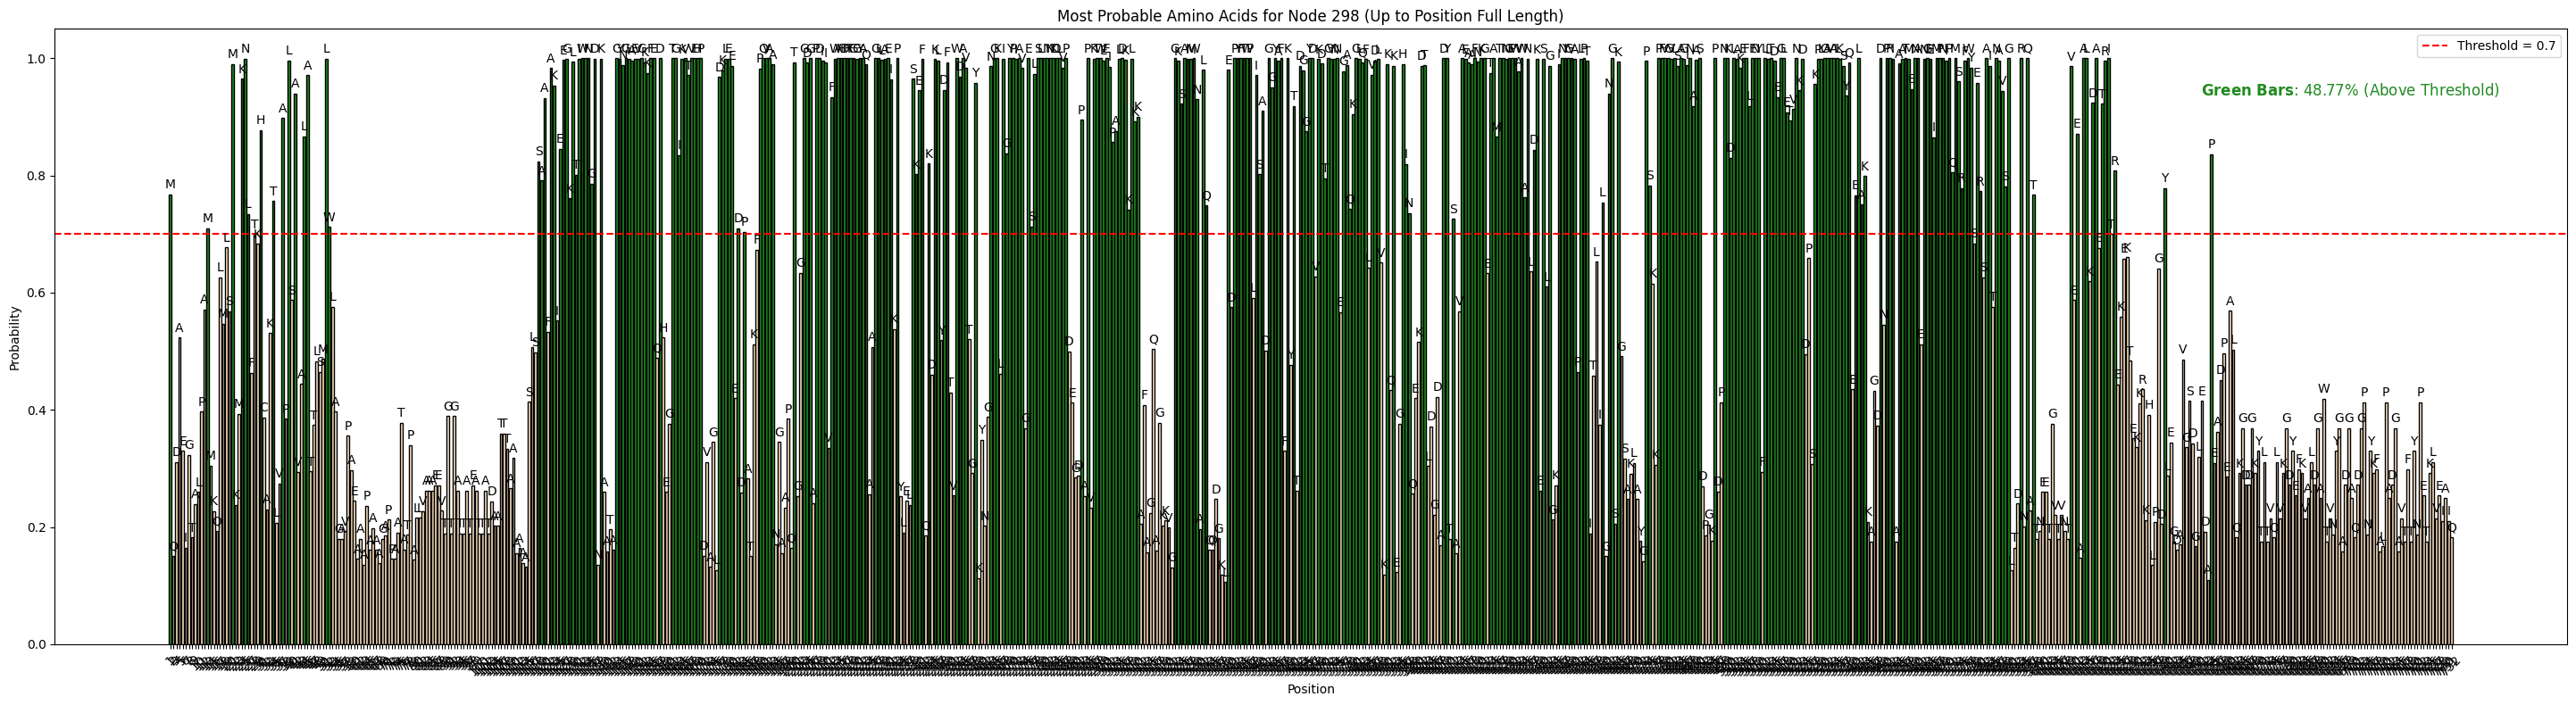

In [7]:
ASR_analysis.plot_most_probable_amino_acids(node=298, threshold=0.7)

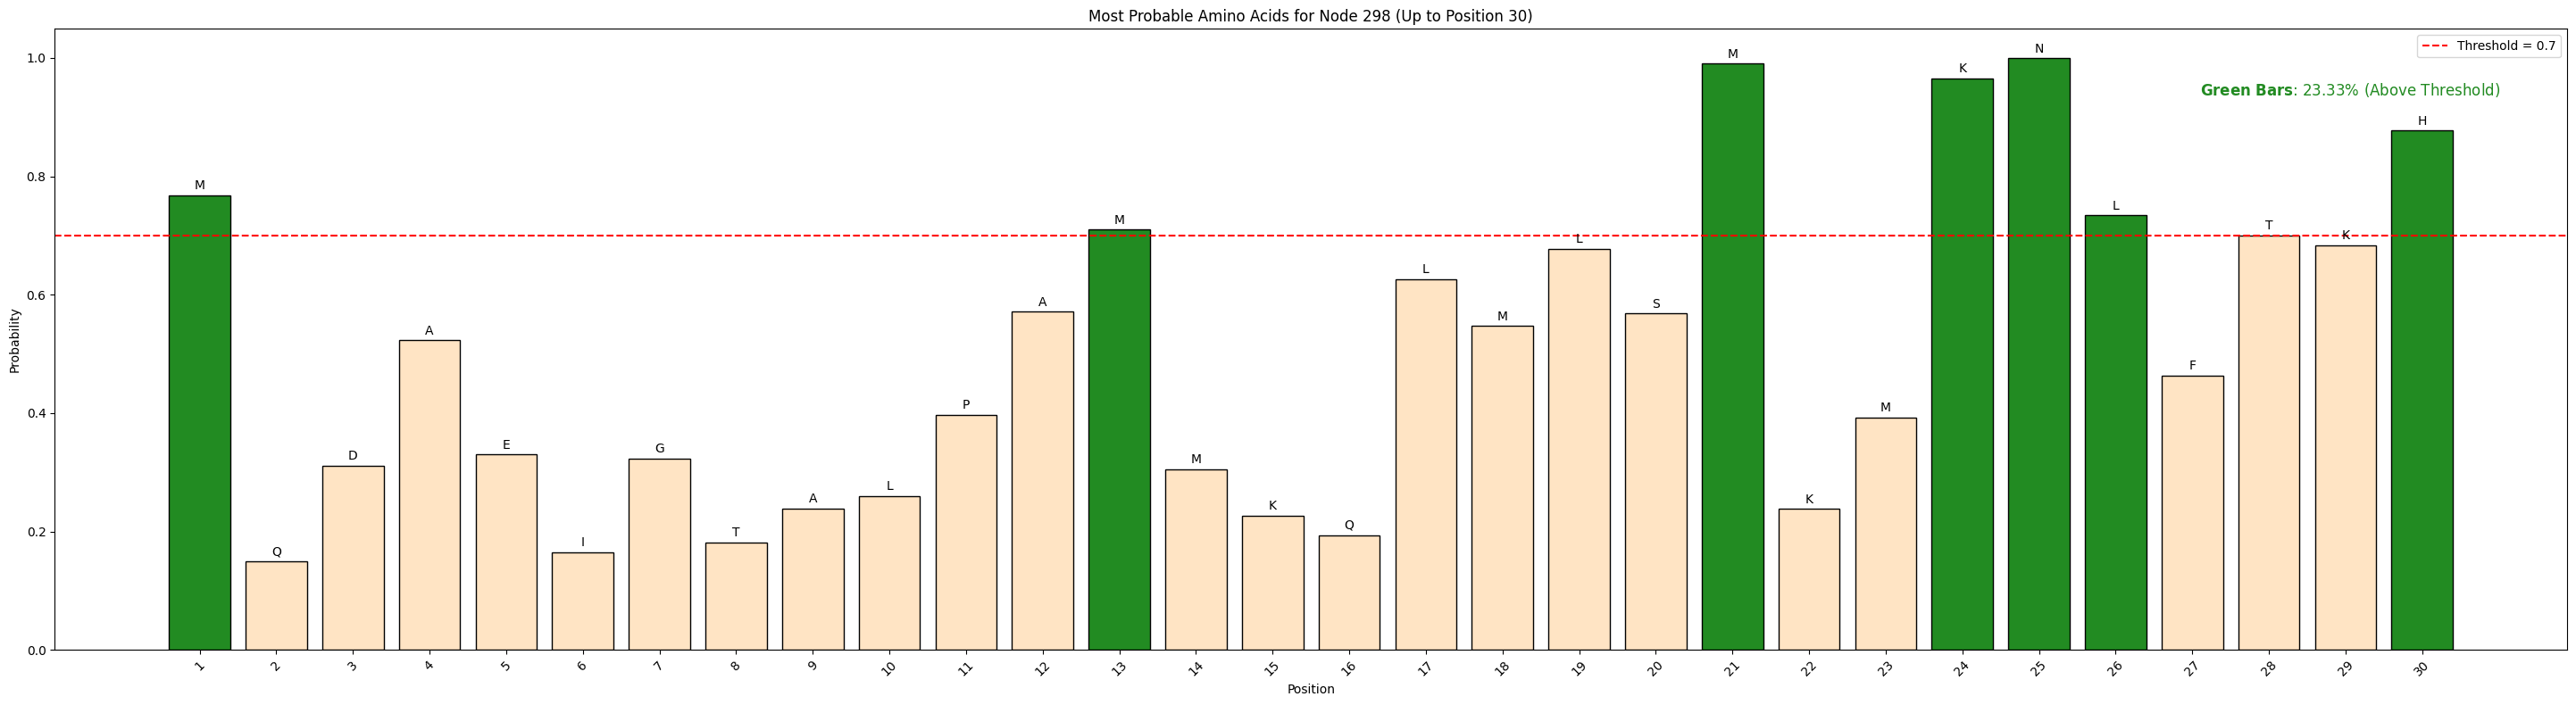

In [8]:
ASR_analysis.plot_most_probable_amino_acids(node=298, threshold=0.7, stop=30)

In [9]:
masked_amino_acids = ASR_analysis.masked_amino_acids(node=298, threshold=0.7)
print(f"Masked amino-acids: {masked_amino_acids}\nSize of masked amino-acids: {len(masked_amino_acids)}")

Masked amino-acids: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 22, 23, 27, 28, 29, 31, 32, 33, 35, 36, 38, 40, 42, 43, 46, 47, 48, 49, 50, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 122, 125, 138, 140, 141, 142, 143, 157, 159, 160, 161, 172, 173, 174, 175, 176, 182, 184, 186, 187, 188, 189, 195, 196, 197, 198, 199, 200, 202, 203, 207, 212, 225, 226, 233, 235, 236, 237, 238, 243, 245, 248, 251, 252, 257, 258, 260, 261, 262, 263, 267, 275, 289, 290, 291, 292, 294, 296, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 331, 334, 335, 336, 337, 338, 339, 341, 348, 352, 358, 360, 362, 368, 376, 385, 389, 390, 392, 394, 395, 399, 400, 401, 404, 405, 406, 407, 408, 411, 413, 414, 423, 437, 440, 442, 444, 445, 452, 456, 457, 458, 4

## Mask & Generate

In [10]:
ASR_298 = ASR_analysis.get_node_sequence(node=298)
ASR_298

'MQDAEIGTALPAMMKQLMLSMKMKNLFTKHCAKTLVAPLSAVALATTLSMLWLAGAVPAEAAAPAAAAGAPPAATATPALLVAAAEEVTGTGATTATEATTATDAATTTAAAAAASLSSAAFAKIEEGKLTIWINGDNKAATAGYNGLAEVGKKFEQDHEGTGIKVTVEHPDVAGLDKLEEEDDPATKFPQVAANGAAPQTGGGDGAPDIIVFWAHDRFGGYAQAAGLLAEIKPYLELSKEFQKDKLYDFTVWDAVTGYKYNGNGKLIGYPIAVGESLSLIYNKDLVPDEGDPAPVKTWEEIPALDKKLKKAFAGQAGKKVGGKSAIMWNALQQQDGKLEDPYFTWPLISADGGYAFFKYTTDGGYDVKDTGVNNEGAQKGLQFLVDLVKKQKEGHINQEKDTLDGDADYTSAVAEAAFNKGETAMTINGPWAWANLDKESLGGKINYGVAPLPTITLILGNGSKGSAKLAYGPSKKPFVGVLSAGINAASDPGKPDPNKDLAKEFLENYFLLTDEGLETVNKDDPSKPLGAVALKSYQEELAKKAGDDNPRIAAATMENAENGEIMPNIPQMSRFWYSERSAITNAVSGLTDRNQATTNEETGVTVNTVEEAALKDAETRITREKEKTEKKRKHLPGDYLEGDAVGSDGLEDAPEADPEALQKGDDGKYTLTVQLVKGDYEFKVALDGAWTVNYGADGAQDGPNYKFALPADGAVTFTYNPETKLVEIAIQ'

In [20]:
%%time

ASR_298 = ASR_analysis.get_node_sequence(node=298)
masked_amino_acids = ASR_analysis.masked_amino_acids(node=298, threshold=0.7) # condition_indices

generated_sequence = generate_conditional_sequence_OA_DM(ASR_298, masked_amino_acids)
print(f"Original sequence:\t{ASR_298}")
print(f"Generated sequence:\t{generated_sequence}")

100%|██████████| 1/1 [00:00<00:00, 17.87it/s]

Original sequence:	MQDAEIGTALPAMMKQLMLSMKMKNLFTKHCAKTLVAPLSAVALATTLSMLWLAGAVPAEAAAPAAAAGAPPAATATPALLVAAAEEVTGTGATTATEATTATDAATTTAAAAAASLSSAAFAKIEEGKLTIWINGDNKAATAGYNGLAEVGKKFEQDHEGTGIKVTVEHPDVAGLDKLEEEDDPATKFPQVAANGAAPQTGGGDGAPDIIVFWAHDRFGGYAQAAGLLAEIKPYLELSKEFQKDKLYDFTVWDAVTGYKYNGNGKLIGYPIAVGESLSLIYNKDLVPDEGDPAPVKTWEEIPALDKKLKKAFAGQAGKKVGGKSAIMWNALQQQDGKLEDPYFTWPLISADGGYAFFKYTTDGGYDVKDTGVNNEGAQKGLQFLVDLVKKQKEGHINQEKDTLDGDADYTSAVAEAAFNKGETAMTINGPWAWANLDKESLGGKINYGVAPLPTITLILGNGSKGSAKLAYGPSKKPFVGVLSAGINAASDPGKPDPNKDLAKEFLENYFLLTDEGLETVNKDDPSKPLGAVALKSYQEELAKKAGDDNPRIAAATMENAENGEIMPNIPQMSRFWYSERSAITNAVSGLTDRNQATTNEETGVTVNTVEEAALKDAETRITREKEKTEKKRKHLPGDYLEGDAVGSDGLEDAPEADPEALQKGDDGKYTLTVQLVKGDYEFKVALDGAWTVNYGADGAQDGPNYKFALPADGAVTFTYNPETKLVEIAIQ
Generated sequence:	MEQDGKCKTAQIMYQDVEQIMCVKNLIKKHKIPTELAILLAALLAIALIALWYLIGQQPAETKDIQKLQNELQHTKEQLVTEKTKTEAKQAAEQTSTTPAKTETTTTTTTVRPVTATTSAAEAKSEEGKLTIWINGDKKVRENGYNGLAEVGKKFESDLKKTGIKVTVEHPYVPVLDKLEEYDKPPLTDPQVAATYEQLETKIGDGVPDIINFWAHDRFGGYAQPKGL

In [ ]:
">ASR298_gen3 MEQDGKCKTAQIMYQDVEQIMCVKNLIKKHKIPTELAILLAALLAIALIALWYLIGQQPAETKDIQKLQNELQHTKEQLVTEKTKTEAKQAAEQTSTTPAKTETTTTTTTVRPVTATTSAAEAKSEEGKLTIWINGDKKVRENGYNGLAEVGKKFESDLKKTGIKVTVEHPYVPVLDKLEEYDKPPLTDPQVAATYEQLETKIGDGVPDIINFWAHDRFGGYAQPKGLLAEIKPLSDLSKEFDKEKLTDFIGWDAVEKYQKQENGKMIGYPIAVGESLSLIYNKDLVPANGVPYPVKTWEEIPALDKKLKKTGQEPYAVTLVGKSAIMWNFLQAYAANYEAPYFTWPSISAMGGYAFTKVTVDGGYDYKDTGVNNIGAQKGLQFYVDLIRKGKIFHINEDLDTAFNVKDYMSGGAEAAFNKGRTAMTINGPWAWANWDKNSSGLGINYGVAWLPTGPNALKNGSKESEQLIWSPSDKPFVGVLSAGINAASGDFIPNKNKDLAKEFLENYVLLTDEGLETVNKDQFNKPLGAVALKSYQEELAKLGIKDVPRITAATMENASNGEIMPNIPQMSRFWYGERPAILNAVSGVDERDQKTIENVKKSFNVYVSEDALADAETRIARWQEQIEAQGLPNPKQYALMTDKMKDILAKKPQFIGESTEMVAPAIQENAAWYNKPYLEIEQALFYHQKMDKLLVDKLPSVADVAGGDTTLESRNYPEVRKVLKAAFGA"
"MNMQIGTIRGPWMKLVASARMNTKNLNQSHTHRTLIALLVAMALALIIAVLWRALVSREATPTEQNIACMVSSKSNVAEIVAVGALPGGHEPTPEPLQGNHGYNRWVDAENVTYKDNASAAEAKDEEGKLTIWINGDEKNVAAGYNGLAEVGKKFEADVRATGIKVTVEHPIYTAWDKLEEKDPPKWVDPQVAAKNIRSITKAGDGLPDIIAFWAHDRFGGYAQWSGLLAEINPEVYWSKEFVKDKLKDFKNWDAVASYTVTENGKVIGYPIAVNESLSLIYNKDLVPKDKEPFPMKTWEEIPALDKKLKKAQPGQPWIAGGGKSAIMWNLLQSDHTGQEPPYFTWPYISAIGGYAFWKPTADGGYDWKDTGVNNEGAQKGLQFWVDLADKGKITHINFEPDTPQTRWDYDSKSAEAAFNKGWTAMTINGPWAWANPDKTSWGTNINYGVAGLPTAYKDLFNGMKVWYRQSKNPSENPFVGVLSAGINAASTLIRPNENKDLAKEFLENYFLLTDEGLETVNKDFGMKPLGAVALKSYQAELAKMTGVDDPRILAATMENAPNGEIMPNIPQMSRFWYAERTAIPNAVSGMVGRRQSTNGEIINEDDVKVNEAALPDAETRIKRLKMGGKDTVEELIGRYQVCKEISRVGLAGTPQIMGWVDQTTASGAFGPFGAALSAQYNDRGMRLVIPESTDPAGIKNLVDALAKQIAQAKRDRSYGVPEIMAQFIRNG"
"MEQDGKCKTAQIMYQDVEQIMCVKNLIKKHKIPTELAILLAALLAIALIALWYLIGQQPAETKDIQKLQNELQHTKEQLVTEKTKTEAKQAAEQTSTTPAKTETTTTTTTVRPVTATTSAAEAKSEEGKLTIWINGDKKVRENGYNGLAEVGKKFESDLKKTGIKVTVEHPYVPVLDKLEEYDKPPLTDPQVAATYEQLETKIGDGVPDIINFWAHDRFGGYAQPKGLLAEIKPLSDLSKEFDKEKLTDFIGWDAVEKYQKQENGKMIGYPIAVGESLSLIYNKDLVPANGVPYPVKTWEEIPALDKKLKKTGQEPYAVTLVGKSAIMWNFLQAYAANYEAPYFTWPSISAMGGYAFTKVTVDGGYDYKDTGVNNIGAQKGLQFYVDLIRKGKIFHINEDLDTAFNVKDYMSGGAEAAFNKGRTAMTINGPWAWANWDKNSSGLGINYGVAWLPTGPNALKNGSKESEQLIWSPSDKPFVGVLSAGINAASGDFIPNKNKDLAKEFLENYVLLTDEGLETVNKDQFNKPLGAVALKSYQEELAKLGIKDVPRITAATMENASNGEIMPNIPQMSRFWYGERPAILNAVSGVDERDQKTIENVKKSFNVYVSEDALADAETRIARWQEQIEAQGLPNPKQYALMTDKMKDILAKKPQFIGESTEMVAPAIQENAAWYNKPYLEIEQALFYHQKMDKLLVDKLPSVADVAGGDTTLESRNYPEVRKVLKAAFGA"

### $\to$ For each Ancestral (with step 2 [skip one]), we $\color{green}{\text{mask amino acids that have a probability ranking higher than 0.7}}$. Otherwise, we keep the others fixed. Using EvoDiff generative model (OADM), we generate new sequences (we approximately mask around 50% of the amino acids).


#### $\bullet$ D3PM is not ideal because it explicitly models **discrete token transitions**, requiring the entire sequence context. This makes it inflexible and inefficient for tasks like partial masking, where only certain amino acids are updated while others remain fixed. Its design focuses on transitioning entire sequences rather than selectively refining parts, which conflicts with your strategy of conditional generation.

In [ ]:
import csv
from evodiff.pretrained import OA_DM_640M
from evodiff.conditional_generation import inpaint_simple
import torch

/home/johnny/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Load the model
checkpoint = OA_DM_640M()
model, collater, tokenizer, scheme = checkpoint

# Move the model to CUDA if available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)

CPU times: user 3.75 s, sys: 2.47 s, total: 6.21 s
Wall time: 5.02 s


In [12]:
%%time

# Generate 10 conditional sequences for a node
def generate_sequences_for_nodes(ASR_analysis, ancestral_nodes, threshold=0.7, num_proteins=10, save_path=""):
    """
    Generates conditional sequences for a list of ancestral nodes and saves them to a CSV file.

    Args:
    - ASR_analysis: Instance of the FireProtASR_AminoAcid_Analysis class.
    - ancestral_nodes (list): List of ancestral node IDs.
    - threshold (float): Probability threshold for masking.
    - num_proteins (int): Number of sequences to generate per node.
    - save_path (str): Path to save the results file.

    Returns:
    - None: Writes the results to a CSV file.
    """
    results = []
    for node in ancestral_nodes:
        # Get the original sequence for the node
        original_sequence = ASR_analysis.get_node_sequence(node=node)

        # Get the condition indices for masking
        condition_indices = ASR_analysis.masked_amino_acids(node=node, threshold=threshold)

        print(f"Generating sequences for node {node} with {len(condition_indices)} masked positions...")

        # Generate multiple sequences
        for i in range(num_proteins):
            generated_sequence = generate_conditional_sequence_OA_DM(original_sequence, condition_indices)
            results.append({
                "Node": node,
                "Sequence_ID": f"{node}_protein_{i + 1}",
                "Original_Sequence": original_sequence,
                "Generated_Sequence": generated_sequence
            })

    # Save the results to a CSV file
    file_name = "10GenSeq-Per-Anc-step2-t0_7.csv"
    save_file = save_path + file_name
    with open(save_file, "w", newline="") as f:
        writer = csv.DictWriter(f, fieldnames=["Node", "Sequence_ID", "Original_Sequence", "Generated_Sequence"])
        writer.writeheader()
        writer.writerows(results)

    print(f"Results saved to {save_file}")


# Example
ASR_analysis = FireProtASR_AminoAcid_Analysis(file_path)
ancestral_nodes_step2 = [299, 296, 293, 285, 264, 261, 151]
save_path = "/home/johnny/Downloads/Fire-Prot-ASR/results_lbynr7_623-Escherichia-coli/"

generate_sequences_for_nodes(
    ASR_analysis=ASR_analysis,
    ancestral_nodes=ancestral_nodes_step2,
    threshold=0.7,
    num_proteins=10,
    save_path=save_path
)

Generating sequences for node 299 with 366 masked positions...


100%|██████████| 1/1 [00:00<00:00, 17.25it/s]


Generating sequences for node 296 with 379 masked positions...


100%|██████████| 1/1 [00:00<00:00, 16.89it/s]


Generating sequences for node 293 with 375 masked positions...


100%|██████████| 1/1 [00:00<00:00, 17.12it/s]


Generating sequences for node 285 with 350 masked positions...


100%|██████████| 1/1 [00:00<00:00, 17.27it/s]


Generating sequences for node 264 with 359 masked positions...


100%|██████████| 1/1 [00:00<00:00, 17.30it/s]


Generating sequences for node 261 with 422 masked positions...


100%|██████████| 1/1 [00:00<00:00, 16.32it/s]


Generating sequences for node 151 with 409 masked positions...


100%|██████████| 1/1 [00:00<00:00, 16.65it/s]


Results saved to /home/johnny/Downloads/Fire-Prot-ASR/results_lbynr7_623-Escherichia-coli/10GenSeq-Per-Anc-step2-t0_7.csv
CPU times: user 28min 3s, sys: 45.2 s, total: 28min 49s
Wall time: 28min 37s


## How similar they are with the original Anc. node??

In [13]:
import csv

def load_generated_data(file_path):
    """
    Loads the generated sequences from the specified CSV file.

    Args:
    - file_path (str): Path to the CSV file.

    Returns:
    - dict: Dictionary containing nodes, original sequences, and generated sequences.
    """
    data = {}
    with open(file_path, "r") as f:
        reader = csv.DictReader(f)
        for row in reader:
            node = int(row["Node"])
            if node not in data:
                data[node] = {"original_sequence": row["Original_Sequence"], "generated_sequences": []}
            data[node]["generated_sequences"].append(row["Generated_Sequence"])
    return data


def calculate_similarity(original_seq, generated_seq):
    """
    Calculates the overall similarity between the original and generated sequences.

    Args:
    - original_seq (str): The original sequence.
    - generated_seq (str): The generated sequence.

    Returns:
    - float: The similarity percentage.
    """
    same_count = sum(1 for o, g in zip(original_seq, generated_seq) if o == g)
    return (same_count / len(original_seq)) * 100


def calculate_masked_similarity(original_seq, generated_seq, masked_indices):
    """
    Calculates the similarity between the original and generated sequences for masked positions.

    Args:
    - original_seq (str): The original sequence.
    - generated_seq (str): The generated sequence.
    - masked_indices (list): List of masked indices (1-based indexing).

    Returns:
    - float: The similarity percentage for masked positions.
    """
    # Convert masked_indices to 0-based
    masked_indices = [idx - 1 for idx in masked_indices]
    same_count = sum(1 for idx in masked_indices if original_seq[idx] == generated_seq[idx])
    return (same_count / len(masked_indices)) * 100 if masked_indices else 0


def evaluate_similarity(file_path, ASR_analysis, threshold=0.7):
    """
    Evaluates overall and masked similarity for each node and its generated sequences.

    Args:
    - file_path (str): Path to the CSV file containing generated sequences.
    - ASR_analysis: Instance of the FireProtASR_AminoAcid_Analysis class.
    - threshold (float): Threshold used for masking.

    Returns:
    - dict: Dictionary containing similarity results for each node.
    """
    data = load_generated_data(file_path)
    results = {}

    for node, node_data in data.items():
        original_seq = node_data["original_sequence"]
        masked_indices = ASR_analysis.masked_amino_acids(node=node, threshold=threshold)
        generated_seqs = node_data["generated_sequences"]

        node_results = []
        for generated_seq in generated_seqs:
            overall_similarity = calculate_similarity(original_seq, generated_seq)
            masked_similarity = calculate_masked_similarity(original_seq, generated_seq, masked_indices)
            node_results.append({
                "generated_sequence": generated_seq,
                "overall_similarity": overall_similarity,
                "masked_similarity": masked_similarity
            })

        results[node] = node_results

    return results


In [14]:
# File path to the generated sequences
file_path = "/home/johnny/Downloads/Fire-Prot-ASR/results_lbynr7_623-Escherichia-coli/10GenSeq-Per-Anc-step2-t0_7.csv"

# Evaluate similarity for each node
similarity_results = evaluate_similarity(file_path, ASR_analysis, threshold=0.7)

# Print results
for node, node_results in similarity_results.items():
    print(f"Node {node} Results:")
    for result in node_results:
        print(f"Generated Sequence: {result['generated_sequence']}")
        print(f"Overall Similarity: {result['overall_similarity']:.2f}%")
        print(f"Masked Similarity: {result['masked_similarity']:.2f}%")
    print()


Node 299 Results:
Generated Sequence: MTKARGFALVTLLLFIMILSLGAKNLRMKHSMEVEQAGLSAEELARDAVELEKPVILLDLKSVNKDDFVELPLPDNRVYQMGPANPSPETLSGEGGKQPTKKKEERTGEVVPAEMKVSSAAFAKIEEGKLWIWINGDIKGYKKGYNGLAEVGKKFEADMLPTGIKVTVEHPMLRGIDKLEEPFIPAQKLPQVAAQVAKTYTKIGDGLPDIIAFWAHDRFGGYAQSSGLLAEIDPVIVNDKAFLKDKLGPFTNWDAVAKYATYKNGKPIGYPIAVAESLSLIYNKDLVPDRKLPVPYKTWEEIPALDKALKANKPPKLVFSADGKSAIMWNLLQAAQGGGELPYFTWPVIAADGGYAFKKYYPDGKYDIKDTGVNNAGAQAGLQFNVDLTLKNKYIHINVNVDTATGVIDYASGIAEAAFNKGQTAMTINGPWAWANFDKLSDKTFINYGVAPLPTNAIRFNTGYKAGVRYRDVPSVGPFVGVLSAGINAASIIADPKKNKELAKEFLENYFLLTDEGLEIVNKDVEGKPLGAVALKSYQYELAKRNPSDLPRIIAATMENALNGEIMPNIPQMSPFWYAERSAIINAVSGPDGRKQLTLPKGSETDPTVVMELALKDACTRITRKDLGYLNFDRNGNFGYLGGEHWQLRGGAPSPLMSLPWEPLMTRGPHKKEELNEGKLKWSSRIDYVVFGNENERPKWDAVLATLTEAAKKAKKTKPVVEKTKTPKTKSP
Overall Similarity: 53.28%
Masked Similarity: 6.56%
Generated Sequence: MSFVKLSILLSHDQKSMKLSKLSKNKVEKHMNKVKMALLSASLLAVGTSALVASGCATSTTDSGNTSGGGGGTTTATATQKAPAAVVGYDMQVHYRFPLSKWATAVEKKEATDEDWIESAAFAKIEEGKLRIWINGDNKHKILGYNGLAEVGKKFEA

In [ ]:
import pandas as pd

def similarity_results_to_table(similarity_results):
    """
    Converts similarity results to a pandas DataFrame for tabular representation.

    Args:
    - similarity_results (dict): Dictionary containing similarity results for each node.

    Returns:
    - pandas.DataFrame: A DataFrame containing the node, sequence ID, overall similarity, and masked similarity.
    """
    # Prepare data for the DataFrame
    rows = []
    for node, node_results in similarity_results.items():
        for result in node_results:
            rows.append({
                "Node": node,
                "Generated_Sequence": result["generated_sequence"],
                "Overall_Similarity (%)": result["overall_similarity"],
                "Masked_Similarity (%)": result["masked_similarity"]
            })

    # Create DataFrame
    df = pd.DataFrame(rows)
    return df

table = similarity_results_to_table(similarity_results)
table

Node                                 Generated_Sequence  \
0    299  MTKARGFALVTLLLFIMILSLGAKNLRMKHSMEVEQAGLSAEELAR...   
1    299  MSFVKLSILLSHDQKSMKLSKLSKNKVEKHMNKVKMALLSASLLAV...   
2    299  MLDINRYYGYELLYPKLNLSLRGKNNKMKHWKILITALLSAITLAF...   
3    299  MNRETKILFIGFFFFVFSLSGCHKNDFPKHTSKHRIASLSAPGLAQ...   
4    299  MKRLIFGMVLALAALVLMLSACGKNNEPKHEEPAATANLSAKYLAG...   
..   ...                                                ...   
65   151  MGSLRFILPPERMKERGAMRMKMKKKGINSMDRLIITVLLVILTAL...   
66   151  MRRRRDFIVNKHMKMIEKMRMKMKKGRDKRIPCLVGSILTVLLILL...   
67   151  MKKHIKTKMQMQMQTQMQMQMKMKKNTRWTRIMLGATVLIVVLSVL...   
68   151  MNMKKSMTMNMKMNLLVKMKMKMKKNMKILKVSLKKFLLLVPLVIL...   
69   151  MWHLRSPRSPTHMKIFCKMWMKMKKHRVFLLRGLVPVVLGVLLSSL...   

    Overall_Similarity (%)  Masked_Similarity (%)  
0                53.278689               6.557377  
1                54.098361               8.196721  
2                53.415301               6.830601  
3                53.142077               6.284153  
4                53.415301               6.830601  
..                     ...                    ...  
65               46.857923               4.889976  
66               48.907104               8.557457  
67               49.453552               9.535452  
68               48.360656               7.579462  
69               48.497268               7.823961  

[70 rows x 4 columns]

### How similar they are with each other? (the generated seqs. for every Anc. node)

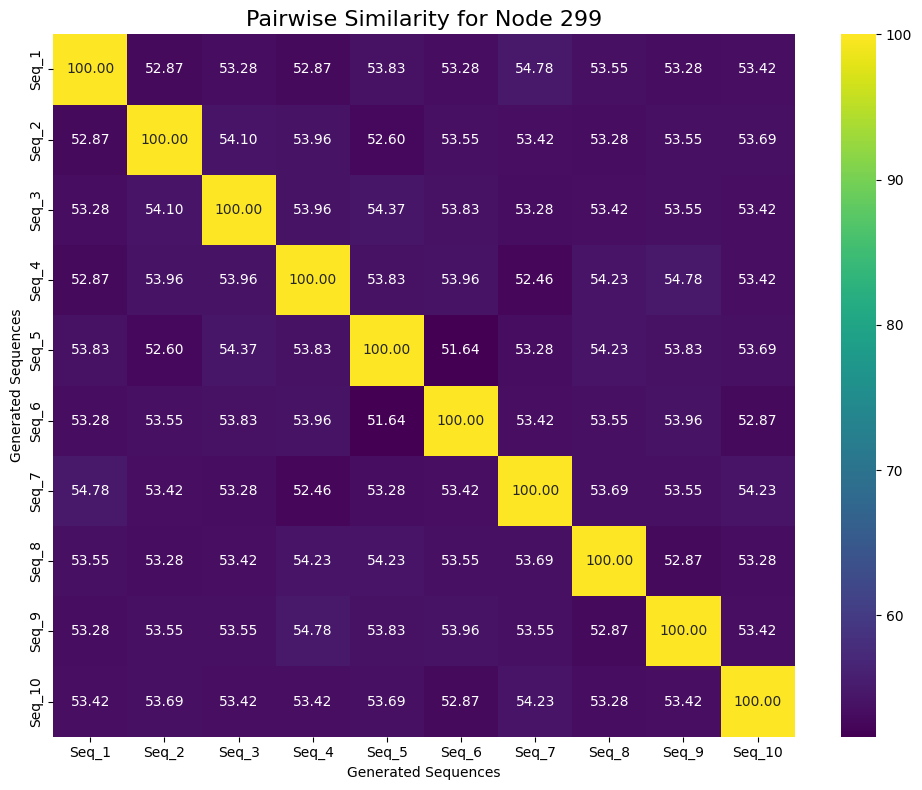

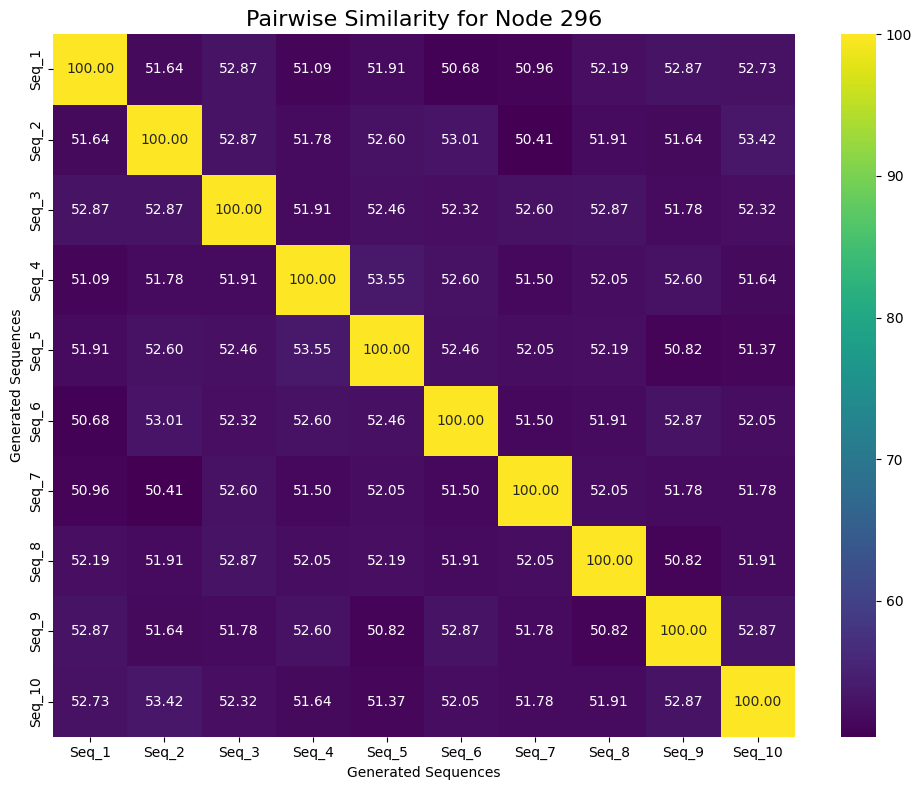

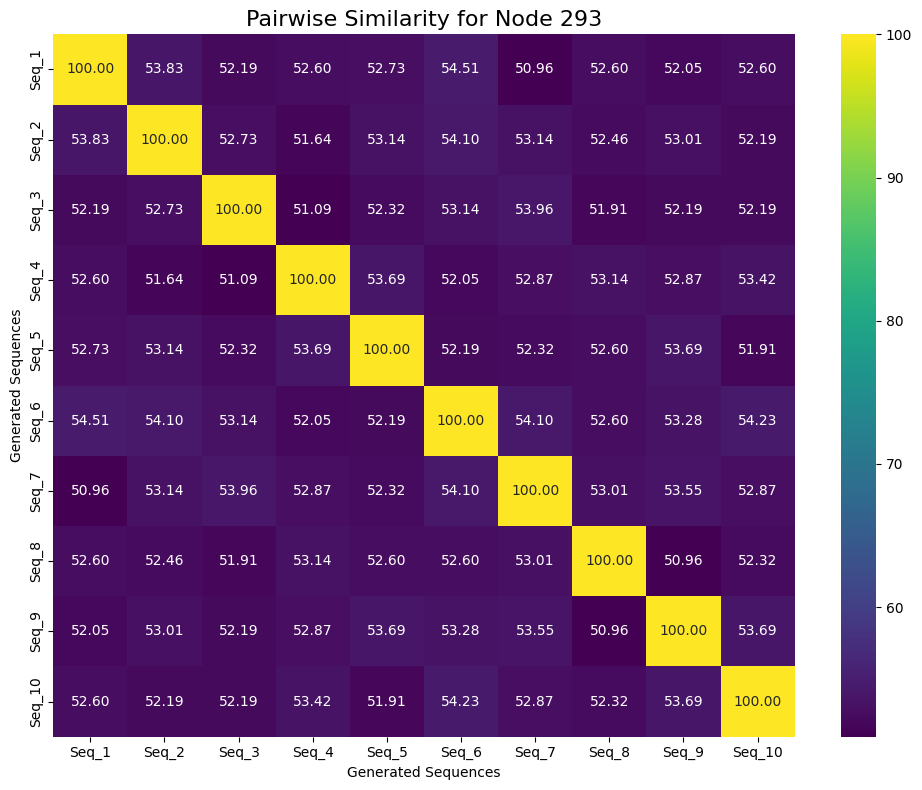

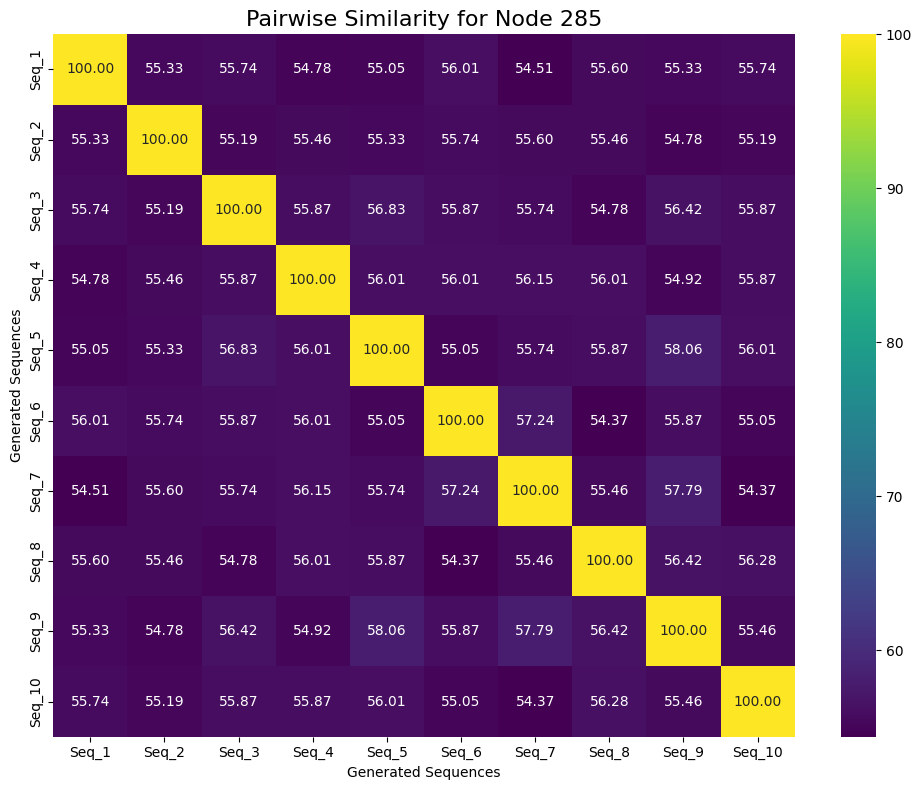

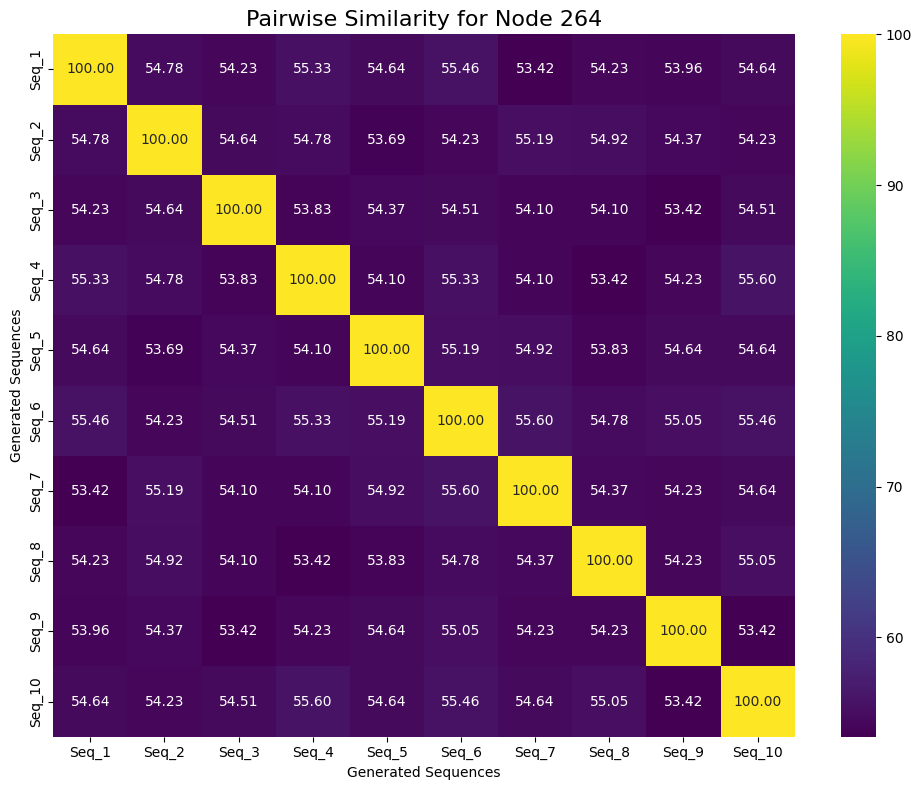

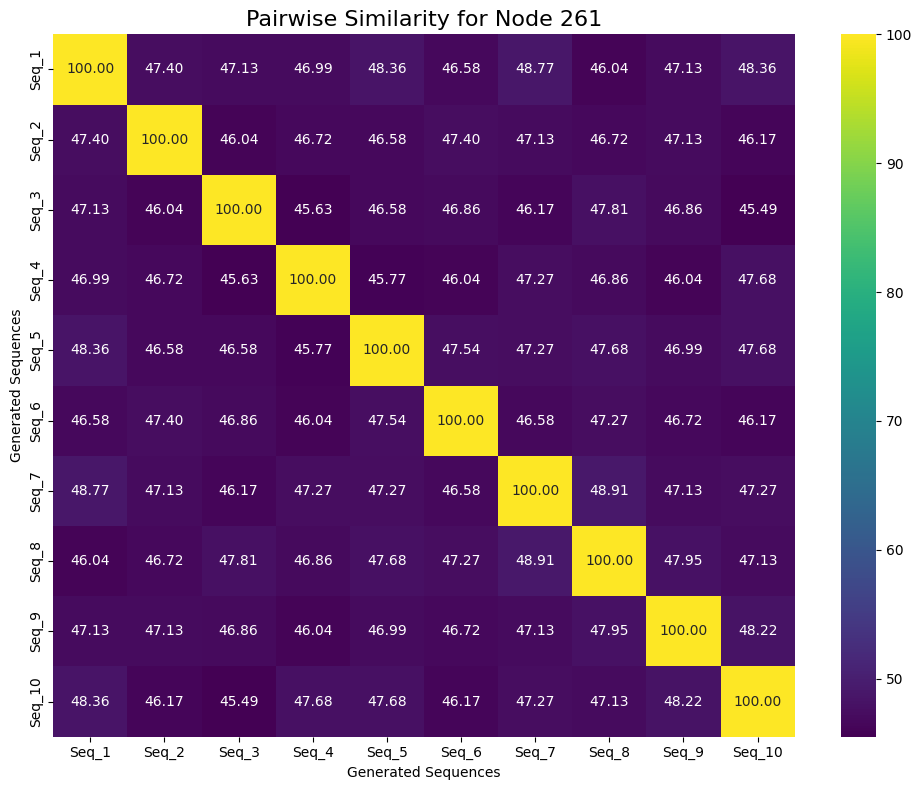

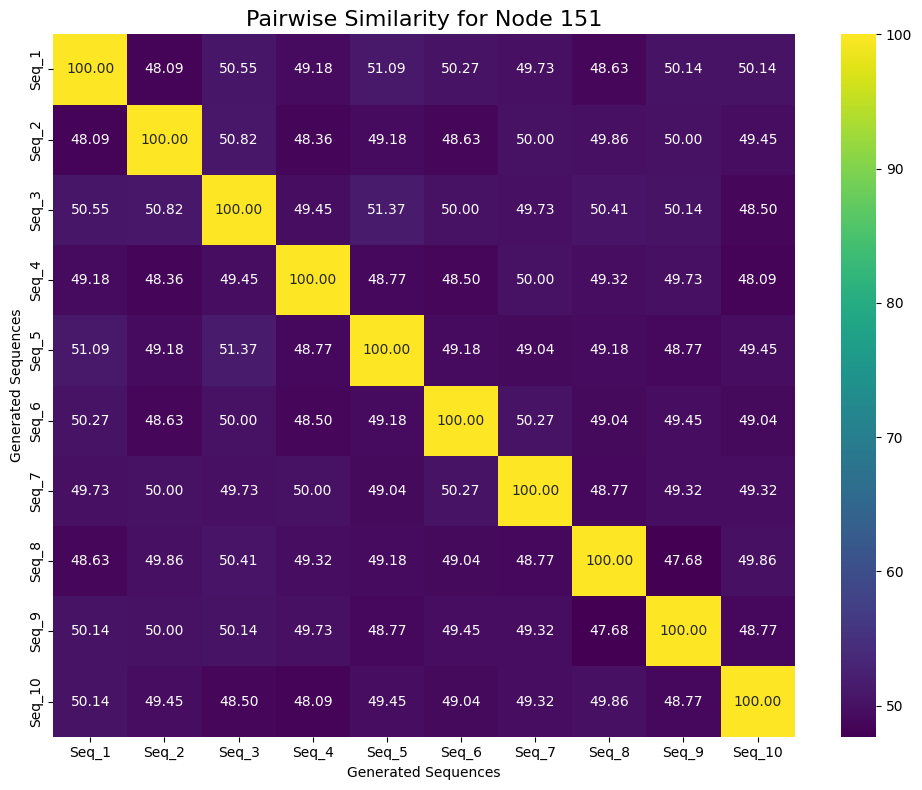

Seq_1       Seq_2       Seq_3       Seq_4       Seq_5  \
Seq_1   100.000000   52.868852   53.278689   52.868852   53.825137   
Seq_2    52.868852  100.000000   54.098361   53.961749   52.595628   
Seq_3    53.278689   54.098361  100.000000   53.961749   54.371585   
Seq_4    52.868852   53.961749   53.961749  100.000000   53.825137   
Seq_5    53.825137   52.595628   54.371585   53.825137  100.000000   
Seq_6    53.278689   53.551913   53.825137   53.961749   51.639344   
Seq_7    54.781421   53.415301   53.278689   52.459016   53.278689   
Seq_8    53.551913   53.278689   53.415301   54.234973   54.234973   
Seq_9    53.278689   53.551913   53.551913   54.781421   53.825137   
Seq_10   53.415301   53.688525   53.415301   53.415301   53.688525   

             Seq_6       Seq_7       Seq_8       Seq_9      Seq_10  
Seq_1    53.278689   54.781421   53.551913   53.278689   53.415301  
Seq_2    53.551913   53.415301   53.278689   53.551913   53.688525  
Seq_3    53.825137   53.278689   53.415301   53.551913   53.415301  
Seq_4    53.961749   52.459016   54.234973   54.781421   53.415301  
Seq_5    51.639344   53.278689   54.234973   53.825137   53.688525  
Seq_6   100.000000   53.415301   53.551913   53.961749   52.868852  
Seq_7    53.415301  100.000000   53.688525   53.551913   54.234973  
Seq_8    53.551913   53.688525  100.000000   52.868852   53.278689  
Seq_9    53.961749   53.551913   52.868852  100.000000   53.415301  
Seq_10   52.868852   54.234973   53.278689   53.415301  100.000000

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def calculate_pairwise_similarity(sequences):
    """
    Calculates the pairwise similarity matrix for a list of sequences.

    Args:
    - sequences (list): List of generated sequences.

    Returns:
    - pd.DataFrame: Pairwise similarity matrix.
    """
    n = len(sequences)
    similarity_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            # Calculate similarity as the percentage of identical positions
            matches = sum(1 for a, b in zip(sequences[i], sequences[j]) if a == b)
            similarity_matrix[i, j] = (matches / len(sequences[i])) * 100

    return pd.DataFrame(similarity_matrix, index=[f"Seq_{i+1}" for i in range(n)],
                        columns=[f"Seq_{i+1}" for i in range(n)])


def visualize_pairwise_similarity(similarity_matrix, node):
    """
    Visualizes the pairwise similarity matrix as a heatmap.

    Args:
    - similarity_matrix (pd.DataFrame): Pairwise similarity matrix.
    - node (int): Node ID for labeling.
    """
    plt.figure(figsize=(10, 8))
    sns.heatmap(similarity_matrix, annot=True, cmap="viridis", fmt=".2f", cbar=True)
    plt.title(f"Pairwise Similarity for Node {node}", fontsize=16)
    plt.xlabel("Generated Sequences")
    plt.ylabel("Generated Sequences")
    plt.tight_layout()
    plt.show()


def analyze_generated_similarity(similarity_results):
    """
    Analyzes and visualizes pairwise similarity for each node's generated sequences.

    Args:
    - similarity_results (dict): Dictionary containing similarity results for each node.

    Returns:
    - dict: Pairwise similarity matrices for each node.
    """
    pairwise_results = {}

    for node, node_results in similarity_results.items():
        # Extract generated sequences for the node
        generated_sequences = [result["generated_sequence"] for result in node_results]

        # Calculate pairwise similarity matrix
        similarity_matrix = calculate_pairwise_similarity(generated_sequences)

        # Store the result
        pairwise_results[node] = similarity_matrix

        # Visualize the heatmap
        visualize_pairwise_similarity(similarity_matrix, node)

    return pairwise_results




pairwise_similarity_results = analyze_generated_similarity(similarity_results)

# Access the pairwise similarity matrix for a specific node (e.g., Node 299)
node_299_matrix = pairwise_similarity_results[299]
node_299_matrix


### How similar they are pairwise? Pairwise similarity matrix for masked positions only.

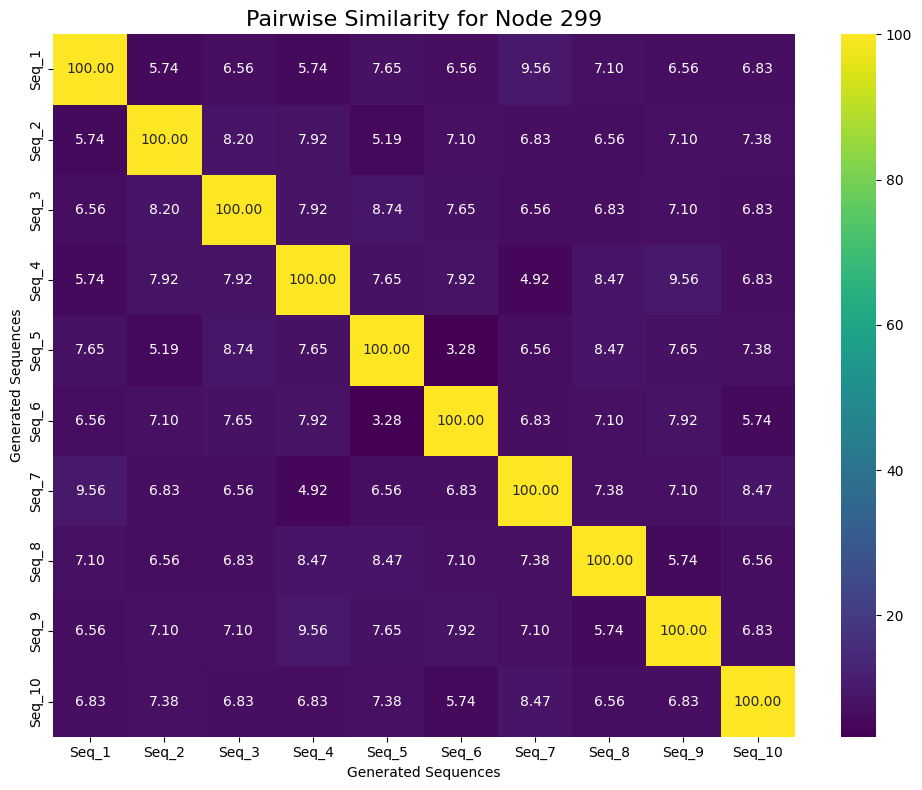

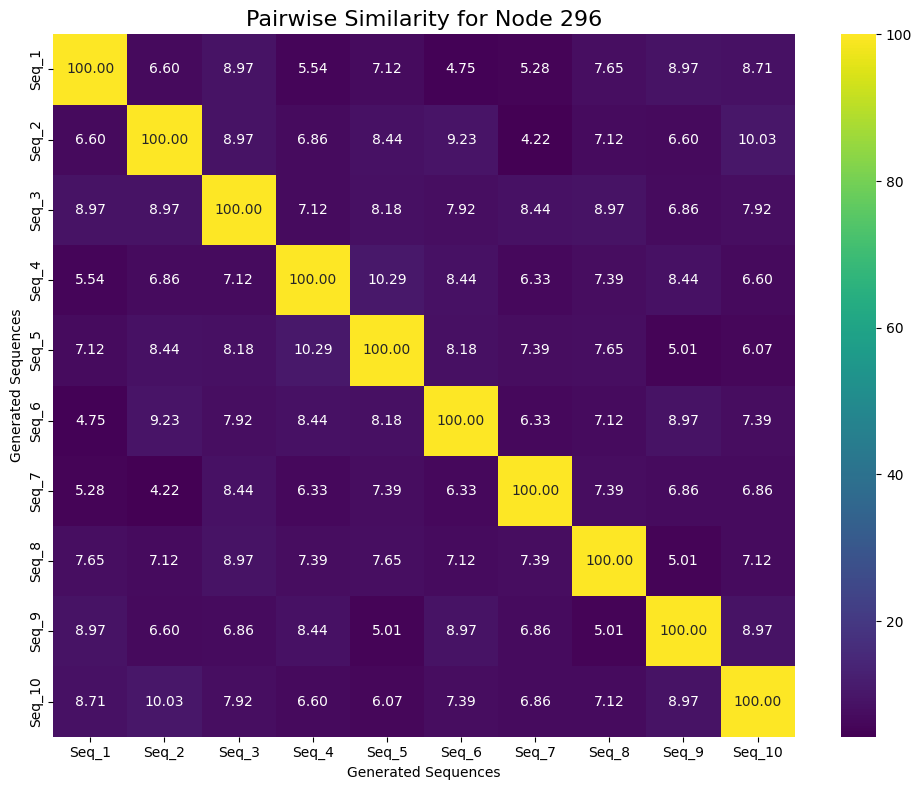

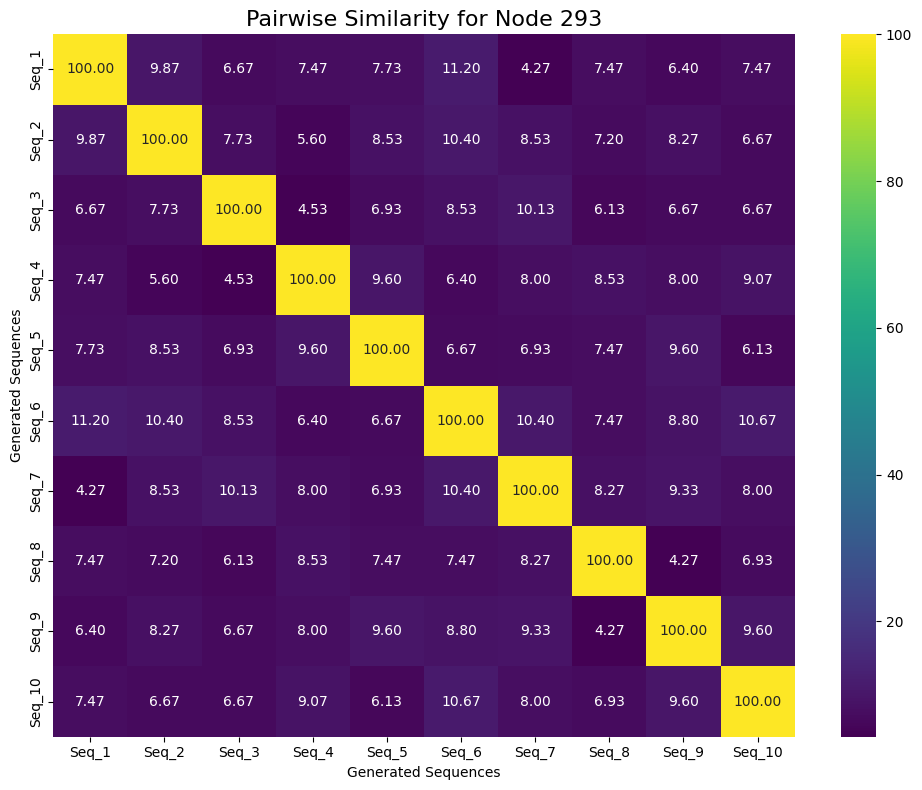

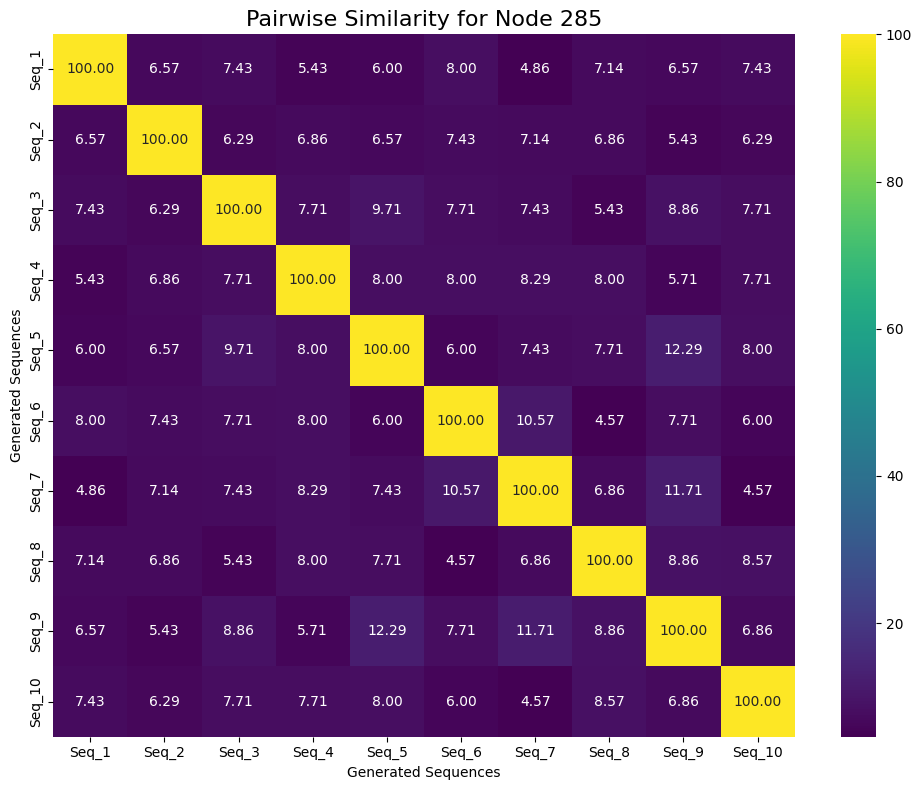

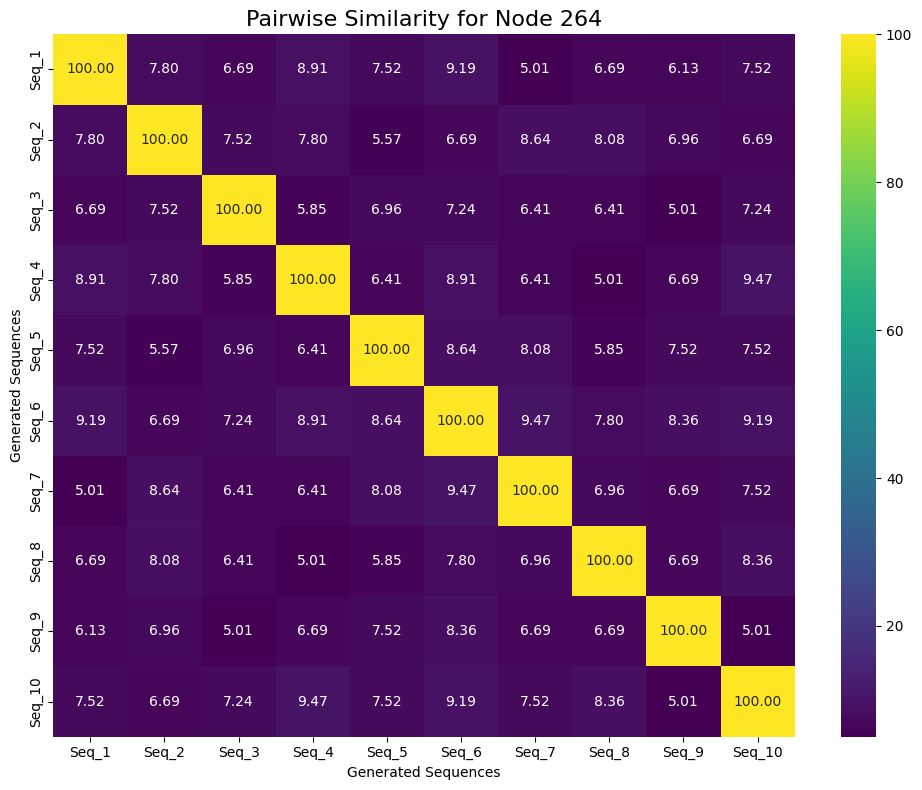

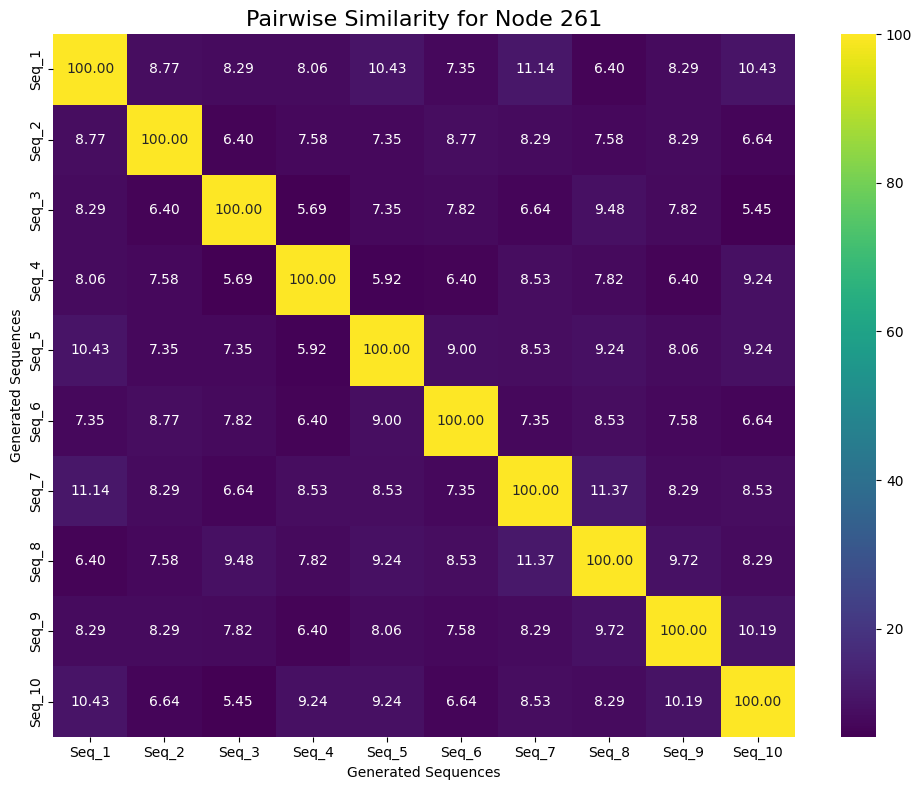

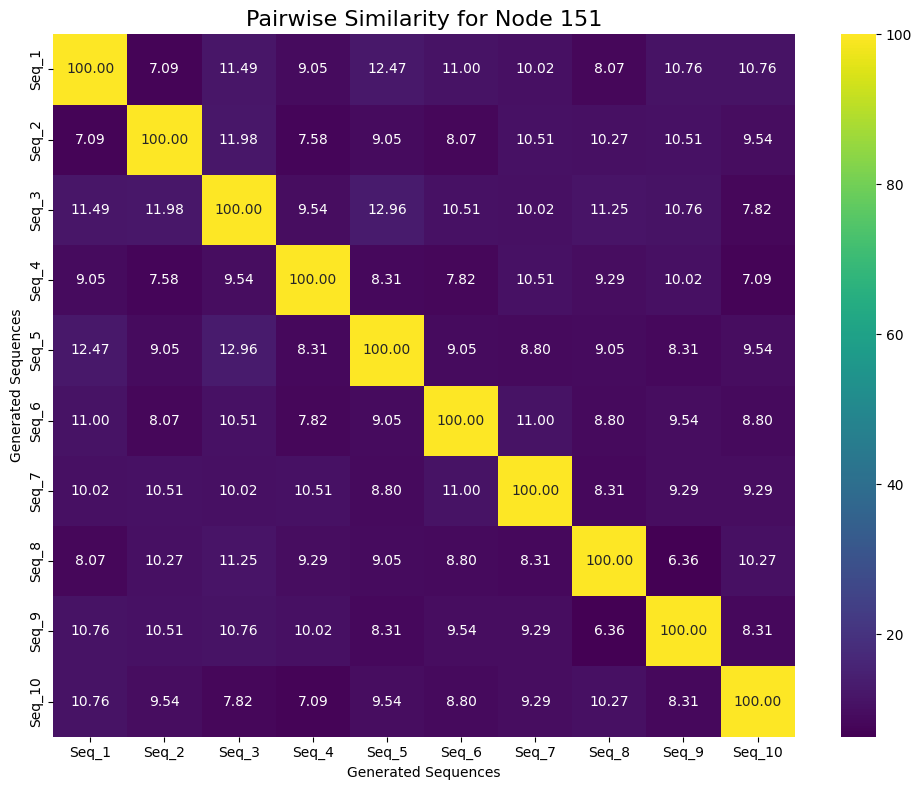

Seq_1       Seq_2       Seq_3       Seq_4       Seq_5  \
Seq_1   100.000000    5.737705    6.557377    5.737705    7.650273   
Seq_2     5.737705  100.000000    8.196721    7.923497    5.191257   
Seq_3     6.557377    8.196721  100.000000    7.923497    8.743169   
Seq_4     5.737705    7.923497    7.923497  100.000000    7.650273   
Seq_5     7.650273    5.191257    8.743169    7.650273  100.000000   
Seq_6     6.557377    7.103825    7.650273    7.923497    3.278689   
Seq_7     9.562842    6.830601    6.557377    4.918033    6.557377   
Seq_8     7.103825    6.557377    6.830601    8.469945    8.469945   
Seq_9     6.557377    7.103825    7.103825    9.562842    7.650273   
Seq_10    6.830601    7.377049    6.830601    6.830601    7.377049   

             Seq_6       Seq_7       Seq_8       Seq_9      Seq_10  
Seq_1     6.557377    9.562842    7.103825    6.557377    6.830601  
Seq_2     7.103825    6.830601    6.557377    7.103825    7.377049  
Seq_3     7.650273    6.557377    6.830601    7.103825    6.830601  
Seq_4     7.923497    4.918033    8.469945    9.562842    6.830601  
Seq_5     3.278689    6.557377    8.469945    7.650273    7.377049  
Seq_6   100.000000    6.830601    7.103825    7.923497    5.737705  
Seq_7     6.830601  100.000000    7.377049    7.103825    8.469945  
Seq_8     7.103825    7.377049  100.000000    5.737705    6.557377  
Seq_9     7.923497    7.103825    5.737705  100.000000    6.830601  
Seq_10    5.737705    8.469945    6.557377    6.830601  100.000000

In [18]:
def calculate_masked_pairwise_similarity(sequences, masked_indices):
    """
    Calculates the pairwise similarity matrix for masked positions only.

    Args:
    - sequences (list): List of generated sequences.
    - masked_indices (list): List of masked indices (1-based indexing).

    Returns:
    - pd.DataFrame: Pairwise masked similarity matrix.
    """
    # Convert masked_indices to 0-based
    masked_indices = [idx - 1 for idx in masked_indices]
    n = len(sequences)
    similarity_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            matches = sum(
                1 for idx in masked_indices if sequences[i][idx] == sequences[j][idx]
            )
            similarity_matrix[i, j] = (matches / len(masked_indices)) * 100 if masked_indices else 0

    return pd.DataFrame(similarity_matrix, index=[f"Seq_{i+1}" for i in range(n)],
                        columns=[f"Seq_{i+1}" for i in range(n)])


def analyze_masked_similarity(similarity_results, ASR_analysis, threshold=0.7):
    """
    Analyzes and visualizes pairwise masked similarity for each node's generated sequences.

    Args:
    - similarity_results (dict): Dictionary containing similarity results for each node.
    - ASR_analysis: Instance of the FireProtASR_AminoAcid_Analysis class.
    - threshold (float): Threshold used for masking.

    Returns:
    - dict: Pairwise masked similarity matrices for each node.
    """
    pairwise_masked_results = {}

    for node, node_results in similarity_results.items():
        # Extract generated sequences and masked indices
        generated_sequences = [result["generated_sequence"] for result in node_results]
        masked_indices = ASR_analysis.masked_amino_acids(node=node, threshold=threshold)

        # Calculate pairwise masked similarity matrix
        similarity_matrix = calculate_masked_pairwise_similarity(generated_sequences, masked_indices)

        # Store the result
        pairwise_masked_results[node] = similarity_matrix

        # Visualize the heatmap
        visualize_pairwise_similarity(similarity_matrix, node)

    return pairwise_masked_results



masked_pairwise_similarity_results = analyze_masked_similarity(similarity_results, ASR_analysis, threshold=0.7)

# Access the masked pairwise similarity matrix for a specific node (e.g., Node 299)
node_299_masked_matrix = masked_pairwise_similarity_results[299]
node_299_masked_matrix